# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from scipy import stats
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# memuat dataset
df = pd.read_csv('/content/drive/My Drive/Course/Datasets/Dataset_clustering.csv')
df.head()

,temparature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer_name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# memahami struktur data
df.info()
print("Jumlah Baris:", df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temparature      8000 non-null   float64
 1   humidity         8000 non-null   float64
 2   moisture         8000 non-null   float64
 3   soil_type        8000 non-null   object 
 4   crop_type        8000 non-null   object 
 5   nitrogen         8000 non-null   int64  
 6   potassium        8000 non-null   int64  
 7   phosphorous      8000 non-null   int64  
 8   fertilizer_name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB
Jumlah Baris: 8000


In [4]:
# menangani data yang hilang
df.isnull().sum()

,0
temparature,0
humidity,0
moisture,0
soil_type,0
crop_type,0
nitrogen,0
potassium,0
phosphorous,0
fertilizer_name,0


In [5]:
# analisis distribusi dan korelasi
df.describe(include=np.number)

,temparature,humidity,moisture,nitrogen,potassium,phosphorous
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,30.338895,59.210731,43.580862,18.429125,3.916375,18.512500
std,4.478262,8.177366,12.596156,11.852406,5.494807,13.244113
min,20.000000,40.020000,20.000000,0.000000,0.000000,0.000000
25%,27.050000,53.277500,33.967500,9.000000,0.000000,8.000000
50%,30.240000,59.110000,42.250000,14.000000,1.000000,18.000000
75%,33.460000,65.082500,52.950000,26.000000,5.000000,30.000000
max,40.000000,80.000000,70.000000,46.000000,23.000000,46.000000


In [6]:
# analisis distribusi dan korelasi
df.describe(exclude=np.number)

,soil_type,crop_type,fertilizer_name
count,8000,8000,8000
unique,5,11,7
top,Clayey,Sugarcane,14-35-14
freq,1623,763,1188


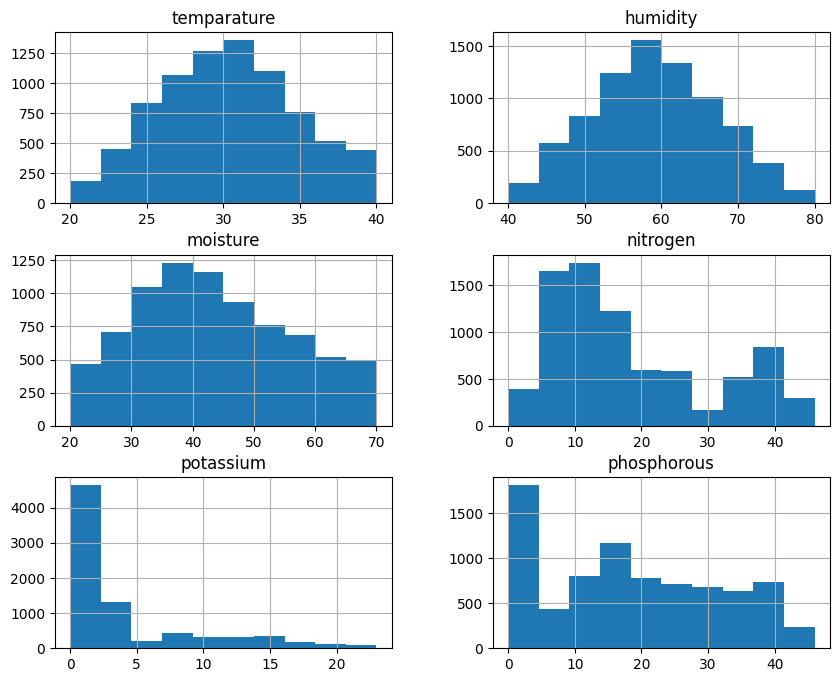

In [7]:
# visualisasi data
df.hist(figsize=(10, 8))
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [8]:
# menghapus atau menangani data kosong (missing values)
df.dropna(inplace=True)

In [9]:
# menghapus data duplikat
df.drop_duplicates()

,temparature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer_name
0,26.00,52.00,38.00,Sandy,Maize,37,0,0,Urea
1,29.00,52.00,45.00,Loamy,Sugarcane,12,0,36,DAP
2,34.00,65.00,62.00,Black,Cotton,7,9,30,14-35-14
3,32.00,62.00,34.00,Red,Tobacco,22,0,20,28-28
4,28.00,54.00,46.00,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
7995,35.30,59.61,44.25,Loamy,Oil seeds,10,14,10,Urea
7996,39.39,71.67,49.34,Black,Barley,35,0,0,10-26-26
7997,35.79,67.64,45.04,Red,Barley,41,0,0,Urea
7998,37.78,73.38,36.03,Black,Tobacco,10,3,30,DAP


In [10]:
# normalisasi atau standarisasi fitur
df_sample = df.sample(2000)
df_sample = df_sample.drop(['soil_type', 'crop_type', 'fertilizer_name'], axis=1)
df_sample.isnull().sum()
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 683 to 799
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temparature  2000 non-null   float64
 1   humidity     2000 non-null   float64
 2   moisture     2000 non-null   float64
 3   nitrogen     2000 non-null   int64  
 4   potassium    2000 non-null   int64  
 5   phosphorous  2000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 109.4 KB


In [11]:
# normalisasi atau standarisasi fitur
encoder = ColumnTransformer([
    ('categorical', OneHotEncoder(), make_column_selector(dtype_exclude=np.number))
], remainder='passthrough')

preprocessor = Pipeline([
    ('encoder', encoder),
    ('Scaler', StandardScaler())
])
df_preprocessed = preprocessor.fit_transform(df_sample)

In [12]:
# deteksi dan penanganan outlier
z_scores_temparature = np.abs(stats.zscore(df['temparature']))
threshold = 3
outlier_mask_temparature = z_scores_temparature > threshold
outliers_temparature = df[outlier_mask_temparature]
print("Outlier berdasarkan Z-Score:\n", outliers_temparature)

z_scores_humidity = np.abs(stats.zscore(df['humidity']))
threshold = 3
outlier_mask_humidity = z_scores_humidity > threshold
outliers_humidity = df[outlier_mask_humidity]
print("Outlier berdasarkan Z-Score:\n", outliers_humidity)

z_scores_moisture = np.abs(stats.zscore(df['moisture']))
threshold = 3
outlier_mask_moisture = z_scores_moisture > threshold
outliers_moisture = df[outlier_mask_moisture]
print("Outlier berdasarkan Z-Score:\n", outliers_moisture)

z_scores_nitrogen = np.abs(stats.zscore(df['nitrogen']))
threshold = 3
outlier_mask_nitrogen = z_scores_nitrogen > threshold
outliers_nitrogen = df[outlier_mask_nitrogen]
print("Outlier berdasarkan Z-Score:\n", outliers_nitrogen)

z_scores_potassium = np.abs(stats.zscore(df['potassium']))
threshold = 3
outlier_mask_potassium = z_scores_potassium > threshold
outliers_potassium = df[outlier_mask_potassium]
print("Outlier berdasarkan Z-Score:\n", outliers_potassium)

z_scores_phosphorous = np.abs(stats.zscore(df['phosphorous']))
threshold = 3
outlier_mask_phosphorous = z_scores_phosphorous > threshold
outliers_phosphorous = df[outlier_mask_phosphorous]
print("Outlier berdasarkan Z-Score:\n", outliers_phosphorous)

Outlier berdasarkan Z-Score:
 Empty DataFrame
Columns: [temparature, humidity, moisture, soil_type, crop_type, nitrogen, potassium, phosphorous, fertilizer_name]
Index: []
Outlier berdasarkan Z-Score:
 Empty DataFrame
Columns: [temparature, humidity, moisture, soil_type, crop_type, nitrogen, potassium, phosphorous, fertilizer_name]
Index: []
Outlier berdasarkan Z-Score:
 Empty DataFrame
Columns: [temparature, humidity, moisture, soil_type, crop_type, nitrogen, potassium, phosphorous, fertilizer_name]
Index: []
Outlier berdasarkan Z-Score:
 Empty DataFrame
Columns: [temparature, humidity, moisture, soil_type, crop_type, nitrogen, potassium, phosphorous, fertilizer_name]
Index: []
Outlier berdasarkan Z-Score:
       temparature  humidity  moisture soil_type    crop_type  nitrogen  \
114         34.71     64.94     52.62     Sandy    Oil seeds         9   
184         31.56     58.25     29.12     Loamy    Oil seeds        13   
295         30.61     66.36     42.09       Red       Barley

In [13]:
# encoding data kategorikal
le = LabelEncoder()
df['soil_type_encoded'] = le.fit_transform(df['soil_type'])
df['crop_type_encoded'] = le.fit_transform(df['crop_type'])
df['fertilizer_name_encoded'] = le.fit_transform(df['fertilizer_name'])
df.head(100)

,temparature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer_name,soil_type_encoded,crop_type_encoded,fertilizer_name_encoded
0,26.00,52.00,38.00,Sandy,Maize,37,0,0,Urea,4,3,6
1,29.00,52.00,45.00,Loamy,Sugarcane,12,0,36,DAP,2,8,5
2,34.00,65.00,62.00,Black,Cotton,7,9,30,14-35-14,0,1,1
3,32.00,62.00,34.00,Red,Tobacco,22,0,20,28-28,3,9,4
4,28.00,54.00,46.00,Clayey,Paddy,35,0,0,Urea,1,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
95,30.00,60.00,27.00,Red,Tobacco,4,17,17,10-26-26,3,9,0
96,38.00,72.00,51.00,Loamy,Wheat,39,0,0,Urea,2,10,6
97,36.00,60.00,43.00,Sandy,Millets,15,0,41,DAP,4,4,5
98,29.00,58.00,57.00,Black,Sugarcane,12,0,10,20-20,0,8,3


In [14]:
# binning (pengelompokan data)
df_grouped_soil_type = df.groupby('soil_type')['soil_type_encoded'].mean().reset_index()
print(df_grouped_soil_type)

df_grouped_crop_type = df.groupby('crop_type')['crop_type_encoded'].mean().reset_index()
print(df_grouped_crop_type)

df_grouped_fertilizer_name = df.groupby('fertilizer_name')['fertilizer_name_encoded'].mean().reset_index()
print(df_grouped_fertilizer_name)

  soil_type  soil_type_encoded
0     Black                0.0
1    Clayey                1.0
2     Loamy                2.0
3       Red                3.0
4     Sandy                4.0
      crop_type  crop_type_encoded
0        Barley                0.0
1        Cotton                1.0
2   Ground Nuts                2.0
3         Maize                3.0
4       Millets                4.0
5     Oil seeds                5.0
6         Paddy                6.0
7        Pulses                7.0
8     Sugarcane                8.0
9       Tobacco                9.0
10        Wheat               10.0
  fertilizer_name  fertilizer_name_encoded
0        10-26-26                      0.0
1        14-35-14                      1.0
2        17-17-17                      2.0
3           20-20                      3.0
4           28-28                      4.0
5             DAP                      5.0
6            Urea                      6.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

For n_clusters = 2, the average silhouette_score is : 0.24723078628217734
For n_clusters = 3, the average silhouette_score is : 0.21225181951164865
For n_clusters = 4, the average silhouette_score is : 0.2260735868863374
For n_clusters = 5, the average silhouette_score is : 0.2236742527005964
For n_clusters = 6, the average silhouette_score is : 0.2153642085385235
For n_clusters = 7, the average silhouette_score is : 0.22139909650244238
For n_clusters = 8, the average silhouette_score is : 0.2176514797461382
For n_clusters = 9, the average silhouette_score is : 0.2263592190124053
For n_clusters = 10, the average silhouette_score is : 0.2205791637883177
For n_clusters = 11, the average silhouette_score is : 0.22473805850610593
For n_clusters = 12, the average silhouette_score is : 0.21609693795814078
For n_clusters = 13, the average silhouette_score is : 0.213981621693796
For n_clusters = 14, the average silhouette_score is : 0.21610131579224212
For n_clusters = 15, the average silhouet

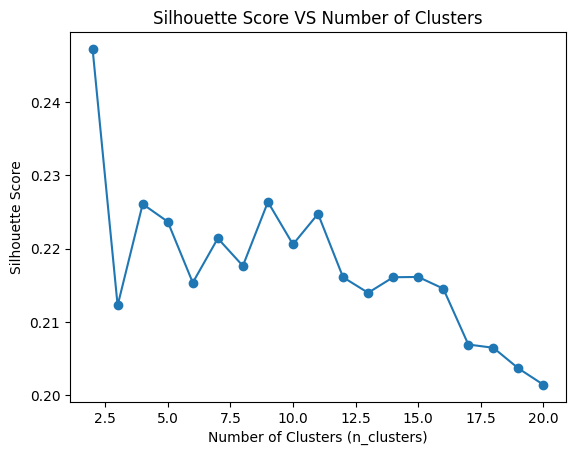

In [15]:
# pembagunan model clustering
range_n_clusters = range(2, 21)
silhouette_scores = []

for n_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  cluster_labels = kmeans.fit_predict(df_preprocessed)
  silhouette_avg = silhouette_score(df_preprocessed, cluster_labels)
  silhouette_scores.append(silhouette_avg)
  print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score VS Number of Clusters')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [16]:
# evaluasi model clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df_preprocessed)
silhouette_avg = silhouette_score(df_preprocessed, cluster_labels)
print(f"The average silhouette_score is : {silhouette_avg}")

The average silhouette_score is : 0.21225181951164865


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

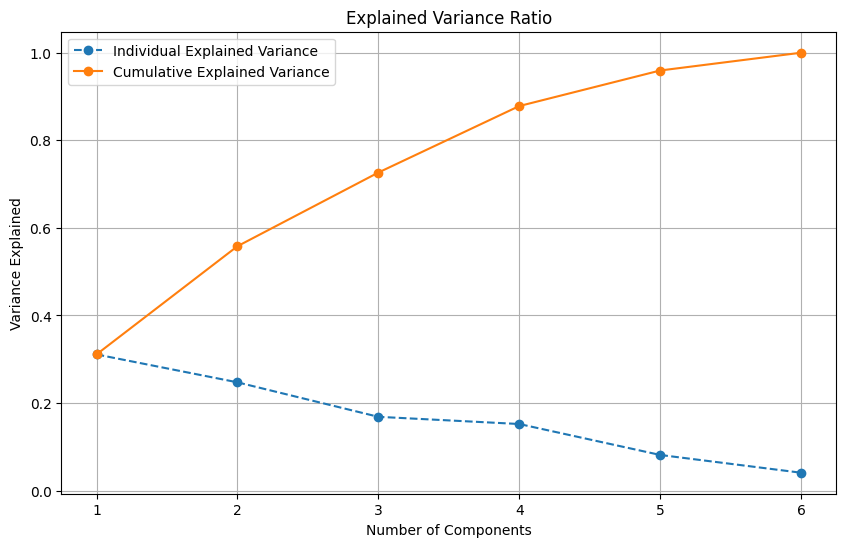

In [17]:
# inisialisasi PCA dengan jumlah komponen yang diinginkan
pca = PCA(n_components=6)

# fit dan transform data yang telah dipreprocess
pca_result = pca.fit_transform(df_preprocessed)

# visualisasi explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')

plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance Ratio')
plt.legend(['Individual Explained Variance', 'Cumulative Explained Variance'])
plt.grid(True)
plt.show()

In [18]:
# rata rata silhouette score
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)
silhouette_avg = silhouette_score(pca_result, cluster_labels)
print(f"The average silhouette_score is : {silhouette_avg}")

The average silhouette_score is : 0.2122518195116486


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

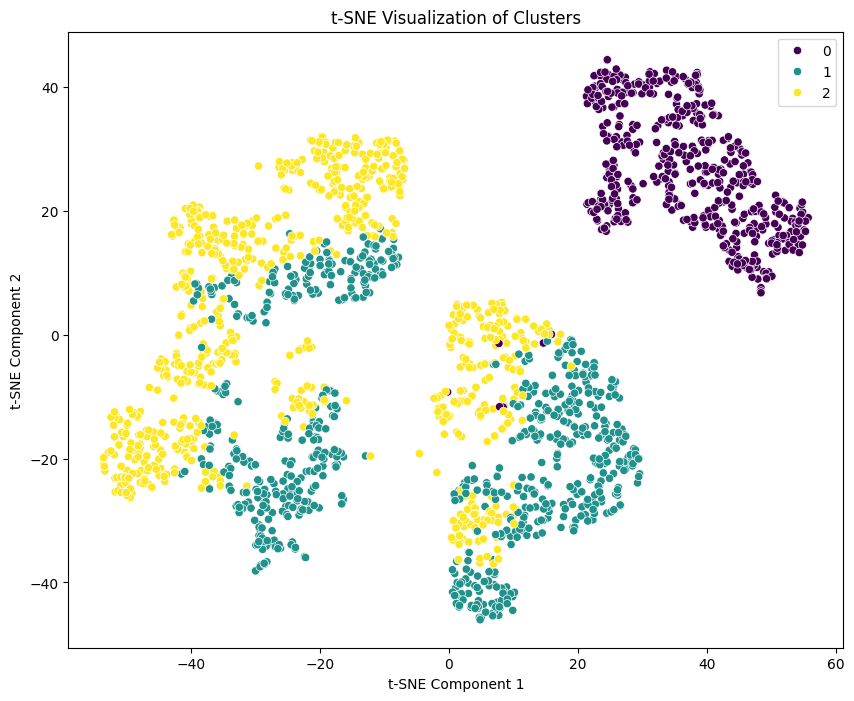

In [19]:
# visualisasi hasil clustering
# inisialisasi t-SNE
tsne = TSNE(n_components=2, random_state=42)

# fit dan transform data hasil PCA
tsne_result = tsne.fit_transform(pca_result)

# buat scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=cluster_labels, palette="viridis")
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [20]:
# label cluster
df_sample['clusters'] = cluster_labels
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 683 to 799
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temparature  2000 non-null   float64
 1   humidity     2000 non-null   float64
 2   moisture     2000 non-null   float64
 3   nitrogen     2000 non-null   int64  
 4   potassium    2000 non-null   int64  
 5   phosphorous  2000 non-null   int64  
 6   clusters     2000 non-null   int32  
dtypes: float64(3), int32(1), int64(3)
memory usage: 117.2 KB


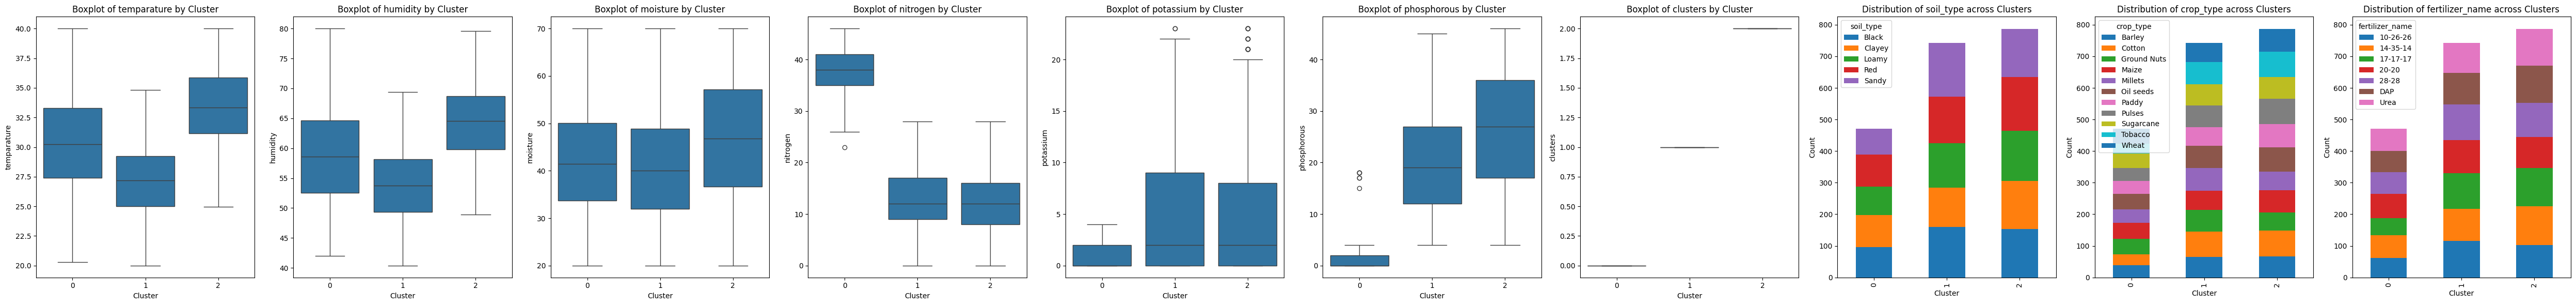

                        mean    min    max      mode
0 temparature      30.490255  20.28  40.00       NaN
  humidity         58.719703  41.97  80.00       NaN
  moisture         42.677473  20.00  70.00       NaN
  nitrogen         37.870488  23.00  46.00       NaN
  potassium         0.925690   0.00   4.00       NaN
  phosphorous       1.225053   0.00  18.00       NaN
  clusters          0.000000   0.00   0.00       NaN
2 temparature      33.562519  24.98  40.00       NaN
  humidity         64.483702  48.95  79.57       NaN
  moisture         46.927099  20.00  70.00       NaN
  nitrogen         12.356234   0.00  28.00       NaN
  potassium         4.734097   0.00  23.00       NaN
  phosphorous      26.493639   4.00  46.00       NaN
  clusters          2.000000   2.00   2.00       NaN
1 temparature      27.035801  20.00  34.83       NaN
  humidity         53.818116  40.37  69.36       NaN
  moisture         41.129017  20.00  70.00       NaN
  nitrogen         13.328398   0.00  28.00    

In [22]:
# identifikasi kolom numerik dan kategorikal
numerical_cols = df_sample.select_dtypes(include=['number']).columns.tolist()

# include 'soil_type' and 'crop_type' in df_sample if they are in the original df
categorical_cols = []
for col in ['soil_type', 'crop_type', 'fertilizer_name']:
    if col in df.columns:
        df_sample[col] = df.loc[df_sample.index, col]
        categorical_cols.append(col)

# jumlah total plot (jumlah numerik + jumlah kategorikal)
total_plots = len(numerical_cols) + len(categorical_cols)

# buat figure dengan subplots
fig, axes = plt.subplots(nrows=1, ncols=total_plots, figsize=(5 * total_plots, 6))

# plot boxplot untuk fitur numerik
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='clusters', y=col, data=df_sample, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(col)

# plot stacked bar chart untuk fitur kategorikal
for j, col in enumerate(categorical_cols, start=len(numerical_cols)):
    cluster_counts = df_sample.groupby(['clusters', col]).size().unstack(fill_value=0)
    cluster_counts.plot(kind='bar', stacked=True, ax=axes[j])
    axes[j].set_title(f'Distribution of {col} across Clusters')
    axes[j].set_xlabel('Cluster')
    axes[j].set_ylabel('Count')
    axes[j].legend(title=col)

# buat dictionary untuk menyimpan hasil analisis
cluster_summary = {}

# loop melalui setiap cluster, using 'clusters' column from df_sample
for cluster in df_sample['clusters'].unique():
    cluster_data = df_sample[df_sample['clusters'] == cluster]
    summary = {}

    # analisis untuk data numerik
    for col in numerical_cols:
        summary[col] = {
            'mean': cluster_data[col].mean(),
            'min': cluster_data[col].min(),
            'max': cluster_data[col].max()
        }

    # analisis untuk data kategorikal
    for col in categorical_cols:
        summary[col] = {'mode': cluster_data[col].mode()[0] if not cluster_data[col].mode().empty else None}

    cluster_summary[cluster] = summary

# konversi hasil ke DataFrame untuk tampilan lebih rapi
summary_df = pd.DataFrame.from_dict({(i,j): cluster_summary[i][j]
                                     for i in cluster_summary.keys()
                                     for j in cluster_summary[i].keys()},
                                    orient='index')


# atur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()
print(summary_df)


## **e. Analisis dan Interpretasi Hasil Cluster**
Berikut adalah analisis karakteristik statistik untuk setiap cluster yang dihasilkan dari temparature, humidity, moisture, nitrogen, potassium, phosphorous, soil_type, crop_type dan fertilizer_name.

## **Cluster 0:**
- **Rata-rata temperature (°C):** 30.49 (Min: 20.28, Max: 40).
- **Rata-rata humidity (%):** 58.71 (Min: 41.97, Max: 80).
- **Rata-rata moisture (%):** 42.67 (Min: 20, Max: 70).
- **Rata-rata nitrogen (N):** 37.87 (Min: 23, Max: 46).
- **Rata-rata potassium (K):** 0.92 (Min: 0, Max: 4).
- **Rata-rata phosphorous (P):** 1.22 (Min: 0, Max: 18).
- **Modus soil_type:** Clayey.
- **Modus crop_type:** Maize.
- **Modus fertilizer_name:** 20-20.
- **Analisis:** Cluster ini menunjukkan kondisi tanah liat dengan kelembaban tanah sedang. Kandungan nitrogen cukup tinggi, sedangkan kalium dan fosfor sangat rendah. Kondisi ini cocok untuk tanaman jagung dengan pupuk NPK 20-20 yang seimbang.

## **Cluster 1:**
- **Rata-rata temperature (°C):** 27.03 (Min: 20, Max: 34.83).
- **Rata-rata humidity (%):** 53.81 (Min: 40.37, Max: 69.36).
- **Rata-rata moisture (%):** 41.12 (Min: 20, Max: 70).
- **Rata-rata nitrogen (N):** 13.32 (Min: 0, Max: 28).
- **Rata-rata potassium (K):** 4.80 (Min: 0, Max: 23).
- **Rata-rata phosphorous (P):** 20,57 (Min: 4, Max: 45).
- **Modus soil_type:** Sandy.
- **Modus crop_type:** Cotton.
- **Modus fertilizer_name:** 14-26-26.
- **Analisis:** Cluster ini memiliki tanah berpasir yang cenderung memiliki kandungan nitrogen lebih rendah dibandingkan Cluster 0. Kalium cukup tinggi, sedangkan fosfor juga cukup tinggi. Tanaman kapas cocok dengan kondisi ini, dengan pupuk 14-26-26 yang mengandung lebih banyak fosfor untuk mendukung pertumbuhan akar.

## **Cluster 2:**
- **Rata-rata temperature (°C):** 33.56 (Min: 24.98, Max: 40).
- **Rata-rata humidity (%):** 64.48 (Min: 48.95, Max: 79.57).
- **Rata-rata moisture (%):** 46.92 (Min: 20.00, Max: 70).
- **Rata-rata nitrogen (N):** 12.35 (Min: 0.00, Max: 28).
- **Rata-rata potassium (K):** 4.73 (Min:0.00, Max: 23).
- **Rata-rata phosphorous (P):** 26.49 (Min: 4.00, Max: 46).
- **Modus soil_type:** Red.
- **Modus crop_type:** Cotton.
- **Modus fertilizer_name:** 14-35-14.
- **Analisis:** Cluster ini memiliki suhu tertinggi dibandingkan yang lain, dengan kelembaban yang cukup tinggi. Tanah merah memiliki kadar fosfor lebih tinggi dibandingkan Cluster 1 dan lebih cocok untuk tanaman kapas. Pupuk 14-35-14 mendukung pertumbuhan tanaman dengan kandungan fosfor yang tinggi.

## **Kesimpulan dan Strategi Bisnis**

### **Kesimpulan:**
Berdasarkan analisis karakteristik setiap cluster, dapat disimpulkan bahwa: Cluster 0 lebih cocok untuk budidaya jagung di tanah liat dengan pupuk NPK seimbang (20-20). Cluster 1 dan Cluster 2 sama-sama cocok untuk kapas, tetapi tanahnya berbeda. Cluster 1 (Sandy soil) lebih rendah fosfornya dan menggunakan pupuk 10-26-26. Cluster 2 (Red soil) memiliki fosfor lebih tinggi dan menggunakan pupuk 14-35-14. Cluster dengan suhu tertinggi adalah Cluster 2, sedangkan yang paling dingin adalah Cluster 1. Kelembaban tanah cukup seragam di semua cluster, tetapi kandungan nitrogen lebih tinggi di Cluster 0.

Strategi Bisnis:

### **Strategi Bisnis:**
1. **Cluster 0**
   - Bisa dimanfaatkan untuk pertanian tanaman dengan kebutuhan unsur hara tinggi, seperti sayuran berdaun hijau atau tanaman dengan siklus pertumbuhan cepat.
2. **Cluster 1**
   - Lebih cocok untuk tanaman yang tidak memerlukan banyak nutrisi tambahan, seperti tanaman kering atau tanaman lokal yang bisa bertahan di kondisi tanah miskin hara.
3. **Cluster 2**
   - Cocok untuk tanaman yang membutuhkan kelembaban tinggi, seperti padi atau tanaman tropis lainnya.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [23]:
df_sample.to_csv("Dataset_inisiasi.csv", index=False)